In [223]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [224]:
import numpy as np
import pandas as pd
import scipy.stats as st
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [225]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [226]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///resources/hawaii.sqlite")
conn = engine.connect()

In [227]:
# Create inspector
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [228]:
# Inspection of measurement class
measuerement_columns = inspector.get_columns("measurement")

for c in measuerement_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [229]:
# Inspection of station class
station_columns = inspector.get_columns("station")

for c in station_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [230]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()

Base.prepare(engine, reflect=True)

In [231]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [232]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [233]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [234]:
first = session.query(Measurement).first()
first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb2101c3eb0>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397',
 'id': 1,
 'prcp': 0.08}

In [235]:
first_ = session.query(Station).first()
first_.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb2101c3850>,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

In [236]:
# Find the most recent date in the data set.

recent_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

recent_date[0]

'2017-08-23'

In [237]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
 
most_recent_date = dt.datetime.strptime(recent_date[0], '%Y-%m-%d')
query_date = dt.date(most_recent_date.year -1, most_recent_date.month, most_recent_date.day)

tot = [Measurement.date,Measurement.prcp]
 
queryresult = session.query(*tot).\
    filter(Measurement.date >= query_date).all()

measurement_df = pd.DataFrame(queryresult, columns=['Date','PRCP'])
measurement_df = measurement_df.dropna(how='any')
measurement_df = measurement_df.sort_values(["Date"], ascending=True)
measurement_df = measurement_df.set_index("Date")
measurement_df.head()
recent_date[0]

'2017-08-23'

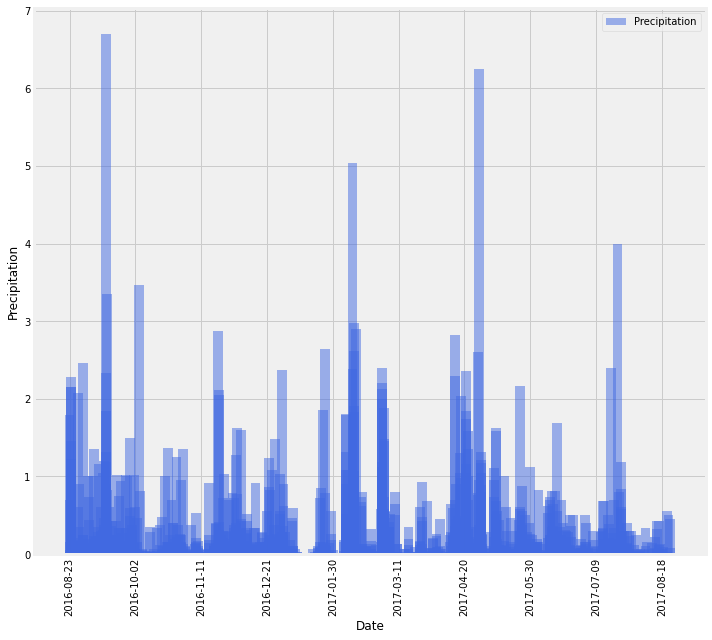

In [238]:
# Use Pandas Plotting with Matplotlib to plot the data
x = measurement_df.index.tolist()
y = measurement_df['PRCP'].tolist()

plt.figure(figsize=(10,9))
plt.bar(x,y,width = 6, color= 'royalblue',alpha=0.5,label='Precipitation')
plt.tick_params
plt.xticks(rotation = 90) 
major_ticks = np.arange(0,400,40)
plt.xticks(major_ticks)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.tight_layout()
plt.grid
plt.legend()
plt.show()

In [239]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurement_df.describe()

,PRCP
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [240]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [241]:
# @app.route("/api/v1.0/stations")
station_list = session.query(Measurement.station).distinct().\
    order_by(Measurement.station).all()
station_list

[('USC00511918',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00516128',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519281',),
 ('USC00519397',),
 ('USC00519523',)]

In [242]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

tot = Measurement.station,func.count(Measurement.id)

station_count = session.query(*tot).\
    group_by(Measurement.station).\
        order_by(func.count(Measurement.id).desc()).all()
        
station_count  

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [243]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Lowest Temperature
tot = Measurement.station, func.min(Measurement.tobs)

min_temp = session.query(*tot).\
    filter(Measurement.station == 'USC00519281').\
        order_by(Measurement.station).all()

min_temp[0]

('USC00519281', 54.0)

In [244]:
# Average Temperature
tot = Measurement.station, func.avg(Measurement.tobs)

avg_temp = session.query(*tot).\
    filter(Measurement.station == 'USC00519281').\
        order_by(Measurement.station).all()

avg_temp[0]

('USC00519281', 71.66378066378067)

In [245]:
# Highest Temperature
tot = Measurement.station, func.max(Measurement.tobs)

max_temp = session.query(*tot).\
    filter(Measurement.station == 'USC00519281').\
        order_by(Measurement.station).all()

max_temp[0]

('USC00519281', 85.0)

In [246]:
recent_date_m = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
recent_date_m


('2017-08-23',)

In [247]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tot = Measurement.station, Measurement.tobs, Measurement.date

most_a = session.query(*tot).\
    filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date >= query_date).all()

most_df = pd.DataFrame(most_a, columns=['Station','Temperature','Date'])
most_df = most_df.dropna(how='any')
most_df = most_df.sort_values(["Date"], ascending=True)
del most_df['Station']
most_df.head()


,Temperature,Date
0,77.0,2016-08-23
1,77.0,2016-08-24
2,80.0,2016-08-25
3,80.0,2016-08-26
4,75.0,2016-08-27


In [248]:
# @app.route("/api/v1.0/tobs")
date_tobs = list(np.ravel(most_a))
date_tobs

['USC00519281',
 '77.0',
 '2016-08-23',
 'USC00519281',
 '77.0',
 '2016-08-24',
 'USC00519281',
 '80.0',
 '2016-08-25',
 'USC00519281',
 '80.0',
 '2016-08-26',
 'USC00519281',
 '75.0',
 '2016-08-27',
 'USC00519281',
 '73.0',
 '2016-08-28',
 'USC00519281',
 '78.0',
 '2016-08-29',
 'USC00519281',
 '77.0',
 '2016-08-30',
 'USC00519281',
 '78.0',
 '2016-08-31',
 'USC00519281',
 '80.0',
 '2016-09-01',
 'USC00519281',
 '80.0',
 '2016-09-02',
 'USC00519281',
 '78.0',
 '2016-09-03',
 'USC00519281',
 '78.0',
 '2016-09-04',
 'USC00519281',
 '78.0',
 '2016-09-05',
 'USC00519281',
 '73.0',
 '2016-09-06',
 'USC00519281',
 '74.0',
 '2016-09-07',
 'USC00519281',
 '80.0',
 '2016-09-08',
 'USC00519281',
 '79.0',
 '2016-09-09',
 'USC00519281',
 '77.0',
 '2016-09-10',
 'USC00519281',
 '80.0',
 '2016-09-11',
 'USC00519281',
 '76.0',
 '2016-09-12',
 'USC00519281',
 '79.0',
 '2016-09-13',
 'USC00519281',
 '75.0',
 '2016-09-14',
 'USC00519281',
 '79.0',
 '2016-09-15',
 'USC00519281',
 '78.0',
 '2016-09-16',


In [249]:
most_df.describe()

,Temperature
count,352.000000
mean,73.107955
std,4.733315
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


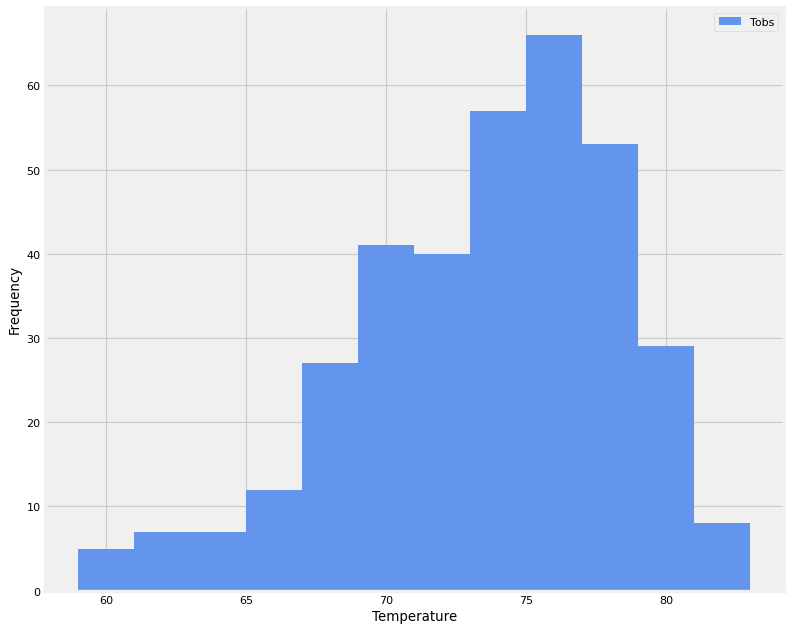

In [250]:
# Most Active Station Temperature Histogram
x = most_df["Temperature"].to_list()

plt.figure(figsize=(10, 8), dpi=80)
plt.hist(x, density=False, bins=12,color='cornflowerblue', label="Tobs")
plt.legend(loc="upper right")
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.tight_layout()

# Close session

In [251]:
# Close Session
session.close()